In [ ]:
import cv2
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.ndimage.filters import uniform_filter

In [ ]:
def get_non_uniform_sampling(source, steps):
    shape = np.shape(source)
    height = shape[0]
    length = shape[1]
    
    x_centre = int(length/2)
    y_centre = int(height/2)
    radius = int(min(length, height)/2)
    
    pi = np.pi
    multiplier = 0.5
    x_coordinates = []
    y_coordinates = []

    for r in steps:
        number_of_points = (1/multiplier) * 2

        for j in range(int(number_of_points)):
            theta = j*pi*multiplier
            x = x_centre + (r * np.cos(theta))
            y = y_centre + (r * np.sin(theta))
            
            if(x<length and x>0 and y<height and y>0):
                x_coordinates.append(int(x))
                y_coordinates.append(int(y))

        multiplier = multiplier/2
    
    return x_coordinates, y_coordinates


def window_stdev(X, window_size):
    c1 = uniform_filter(X, window_size, mode='reflect')
    c2 = uniform_filter(X*X, window_size, mode='reflect')
    return np.sqrt(c2 - c1*c1)

In [ ]:
image = cv2.imread("/content/OS0043EY.JPG")
print(np.shape(image))
(B,G,R) = cv2.split(image)

(1248, 1664, 3)


In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

edged = cv2.Canny(blurred, 10, 100)
np.unique(edged)
arr_edge =  np.where(edged==255)
print(arr_edge)
np.shape(arr_edge)

(array([   0,    0,    1, ..., 1246, 1247, 1247]), array([ 751,  912,  739, ..., 1051,  616, 1046]))


(2, 5075)

7 objects were found in this image.


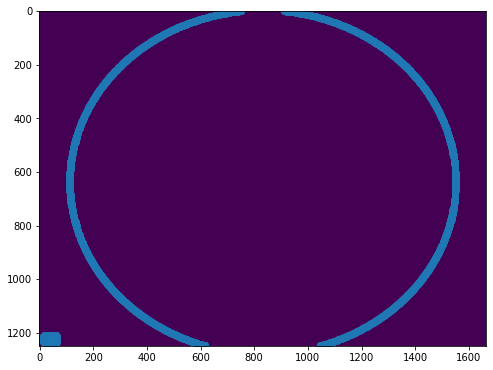

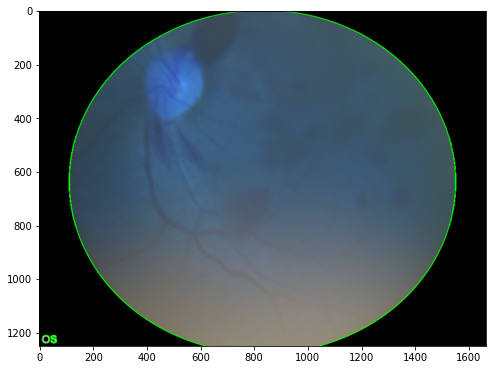

In [ ]:
contours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")

plt.figure(figsize = (8,8))
plt.scatter(arr_edge[1], arr_edge[0])
plt.imshow(edged)
plt.figure(figsize = (8,8))
plt.imshow( image_copy)
#cv2.waitKey(0)

(array([   0,    0,    1, ..., 1246, 1247, 1247]), array([ 751,  912,  739, ..., 1051,  616, 1046]))
(2, 5075)
4 objects were found in this image.


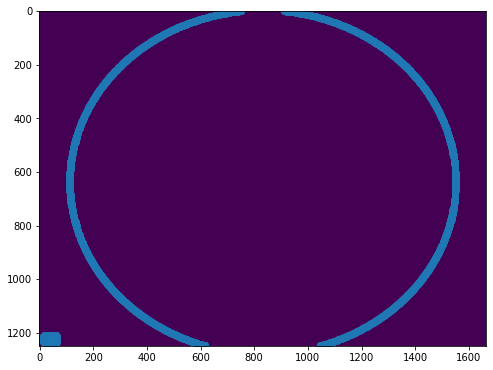

In [ ]:
image = cv2.imread("/content/OS0043EY.JPG")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(blurred, 10, 100)
np.unique(edged)
arr_edge =  np.where(edged==255)
print(arr_edge)
print(np.shape(arr_edge))


# define a (3, 3) structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# apply the dilation operation to the edged image
dilate = cv2.dilate(edged, kernel, iterations=1)

# find the contours in the dilated image
contours, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = image.copy()
# draw the contours on a copy of the original image
cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
print(len(contours), "objects were found in this image.")



# points = np.argwhere(image_copy>0)
# center, radius = cv2.minEnclosingCircle(points)
# print('center:', center, 'radius:', radius)

plt.figure(figsize= (8,8))
plt.scatter(arr_edge[1], arr_edge[0])
plt.imshow(dilate)
# plt.figure(figsize= (8,8))
# plt.imshow(image_copy)
# plt.colorbar()
#cv2.waitKey(0)

OLD PART HERE ONWARDS


In [ ]:
steps = [0, 149, 296, 467, 604, 700]
x_coordinates, y_coordinates = get_non_uniform_sampling(G, steps)
number_of_points = (np.shape(x_coordinates))[0]
print("The number of points is", number_of_points)

The number of points is 214


Text(0.5, 1.0, 'Image and Sampling Points')

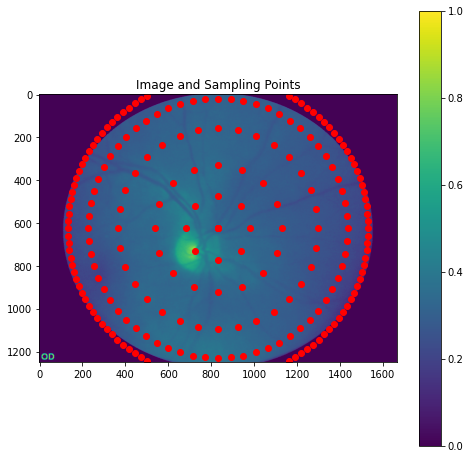

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(G)
plt.scatter(x_coordinates, y_coordinates, color='red')
plt.colorbar()
plt.title("Image and Sampling Points")

In [ ]:
def get_roi(img, y_coor, x_coor, window_size):
  if((y_coor - int(window_size/2)) < 0):
    y_top = 0
  else:
      y_top = y_coor - int(window_size/2)
  if((y_coor + int(window_size/2)) > np.shape(img)[0]):
    y_bottom = np.shape(img)[0]
  else:
      y_bottom = y_coor + int(window_size/2)
  if((x_coor - int(window_size/2)) < 0):
    x_left = 0
  else:
      x_left = x_coor - int(window_size/2)
  if((x_coor + int(window_size/2)) > np.shape(img)[1]):
    x_right = np.shape(img)[1]
  else:
      x_right= x_coor + int(window_size/2)
  
  sliced_image= img[y_top : y_bottom, x_left:x_right]
    
  return(sliced_image)

def get_mean_slice(img, x_coor, y_coor, window_size):
    sliced = get_roi(img, x_coor, y_coor, window_size)
    mean = np.mean(sliced)
    return mean

mean = []
for i in range(number_of_points):
  temp = get_mean_slice(G, x_coordinates[i], y_coordinates[i], 50)
  mean.append(temp)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Mean of Image')

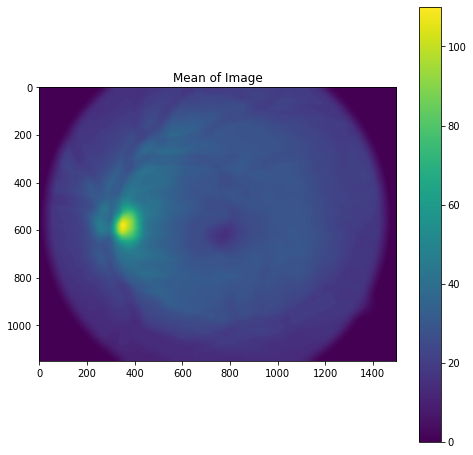

In [ ]:
image_window_size = 50
G_mean = cv2.blur(G, (image_window_size, image_window_size))
G_mean = np.array(G_mean, dtype=np.float32)

plt.figure(figsize = (8,8))
plt.imshow(G_mean)
plt.colorbar()
plt.title("Mean of Image")

Text(0.5, 1.0, 'Standard Deviation of Image')

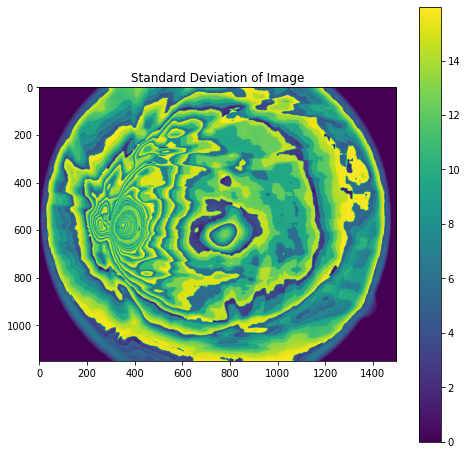

In [ ]:
G_std = window_stdev(G, image_window_size)
G_std = np.array(G_std, dtype=np.float32)

plt.figure(figsize = (8,8))
plt.imshow(G_std)
plt.colorbar()
plt.title("Standard Deviation of Image")

In [ ]:
mean = np.empty(number_of_points)
std = np.empty(number_of_points)

for i in range(number_of_points):
    x = x_coordinates[i]
    y = y_coordinates[i]
    
    mean[i] = G_mean[y, x]
    std[i] = G_std[y, x]

In [ ]:
xi = np.arange(0, np.shape(G)[1], 1)
yi = np.arange(0, np.shape(G)[0], 1)
x_grid, y_grid = np.meshgrid(xi, yi)

points = []
for i , j in zip(x_coordinates, y_coordinates):
    points.append([i,j])

Text(0.5, 1.0, 'Interpolated Mean')

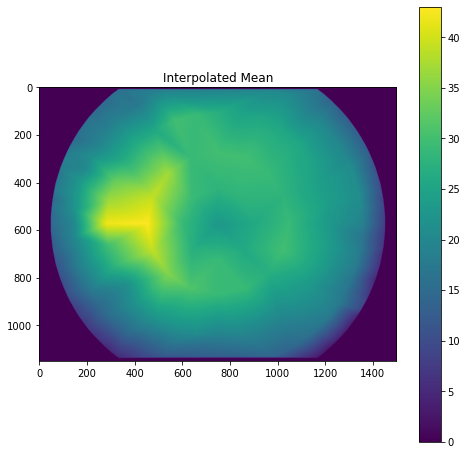

In [ ]:
interpolated_mean = scipy.interpolate.griddata(points, mean, (x_grid, y_grid) , method='linear', fill_value=0, rescale=False)

plt.figure(figsize = (8,8))
plt.imshow(interpolated_mean)
plt.colorbar()
plt.title("Interpolated Mean")

Text(0.5, 1.0, 'Interpolated Standard Deviation')

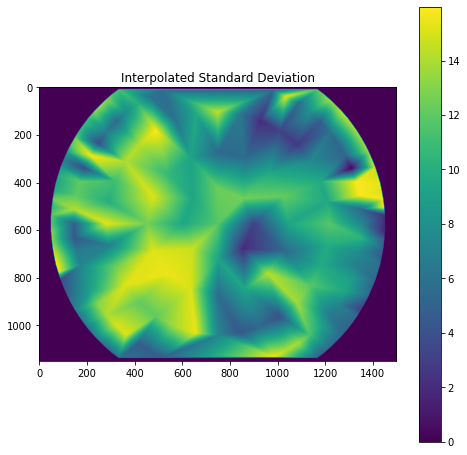

In [ ]:
interpolated_std = scipy.interpolate.griddata(points, std, (x_grid, y_grid) , method='linear', fill_value=0, rescale=False)

plt.figure(figsize = (8,8))
plt.imshow(interpolated_std)
plt.colorbar()
plt.title("Interpolated Standard Deviation")

Text(0.5, 1.0, 'Mahalanobis Distance')

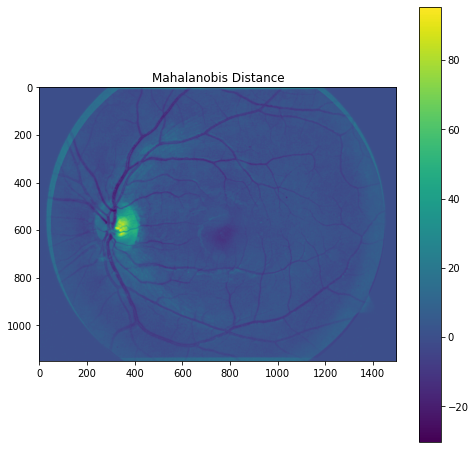

In [ ]:
height = np.shape(G)[0]
length = np.shape(G)[1]

mahalanobis = np.empty(np.shape(G))
background = np.zeros(np.shape(G))

G = np.array(G)
interpolated_mean = np.array(interpolated_mean)
interpolated_std = np.array(interpolated_std)

mahalanobis = (G - interpolated_mean)#/interpolated_std
plt.figure(figsize = (8,8))
plt.imshow(mahalanobis)
plt.colorbar()
plt.title("Mahalanobis Distance")

In [ ]:
for i in range(height):
    for j in range(length):
        if(mahalanobis[i, j] <= 1):
            background[i, j] = 1

Text(0.5, 1.0, 'Background')

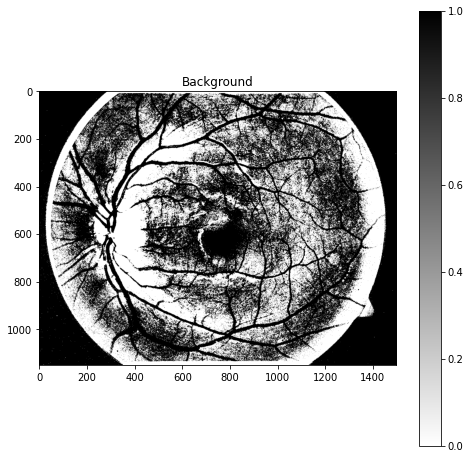

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(background, cmap="binary")
plt.colorbar()
plt.title("Background")

In [ ]:
background_window_size = 125
SA = cv2.blur(background, (background_window_size, background_window_size))
SM = window_stdev(background, background_window_size)

C:\Users\aniru\AppData\Local\Temp/ipykernel_6448/4386335.py:35: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(c2 - c1*c1)


Text(0.5, 1.0, 'SA')

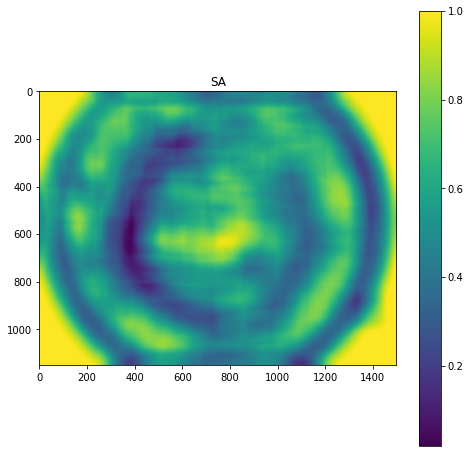

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(SA)
plt.colorbar()
plt.title("SA")

Text(0.5, 1.0, 'SM')

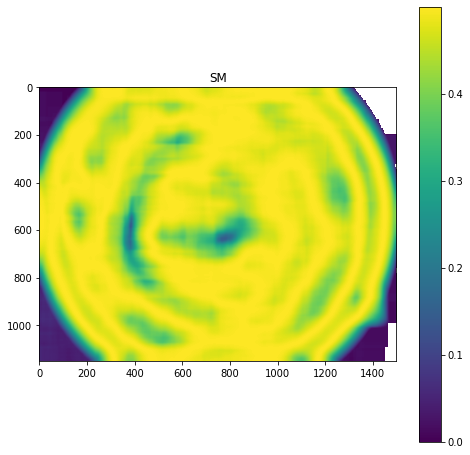

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(SM)
plt.colorbar()
plt.title("SM")

In [ ]:
U = np.empty(np.shape(G))
for i in range(height):
    for j in range(length):
        U[i, j] = (G[i, j] - SA[i, j])/SM[i, j]

C:\Users\aniru\AppData\Local\Temp/ipykernel_6448/2878520282.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  U[i, j] = (G[i, j] - SA[i, j])/SM[i, j]
C:\Users\aniru\AppData\Local\Temp/ipykernel_6448/2878520282.py:4: RuntimeWarning: invalid value encountered in double_scalars
  U[i, j] = (G[i, j] - SA[i, j])/SM[i, j]


In [ ]:
U

array([[           -inf,            -inf,            -inf, ...,
        -3.35544320e+07, -3.35544320e+07, -3.35544320e+07],
       [           -inf,            -inf,            -inf, ...,
        -5.47941580e+07, -5.47941580e+07, -5.47941580e+07],
       [           -inf,            -inf,            -inf, ...,
        -3.35544320e+07, -3.35544320e+07, -3.35544320e+07],
       ...,
       [-1.84007327e+01, -1.84007327e+01, -1.84007327e+01, ...,
                    nan,             nan,             nan],
       [-1.80167747e+01, -1.80167747e+01,  5.31979997e-02, ...,
                    nan,             nan,             nan],
       [-1.80167747e+01, -1.80167747e+01,  5.31979997e-02, ...,
        -9.49062656e+07, -9.49062656e+07, -9.49062656e+07]])

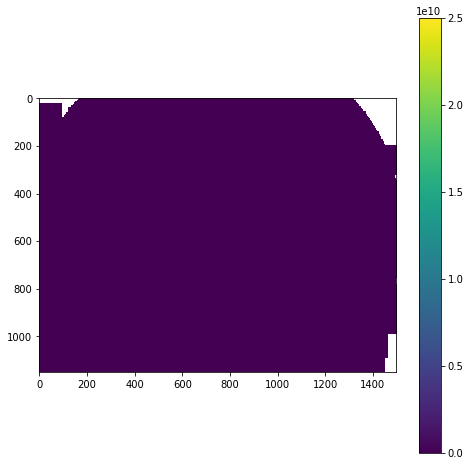

In [ ]:
plt.figure(figsize = (8,8))
plt.imshow(U)
plt.colorbar()
plt.clim(0, 0.25000000e+11);

In [ ]:
a= [2,3,5,6]
a= np.array(a)
x = abs(a - )**2
std = np.sqrt(np.mean(x))

NameError: ignored